<a href="https://colab.research.google.com/github/Chakurkar12/Fashion-MNIST-Classification/blob/main/cnn_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fasion MNIST Data Classification Project


Step 1: Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Step 2: Load Data

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,y_train.shape, "***************" ,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top",	"Trouser",	"Pullover",	"Dress",	"Coat"	,"Sandal"	,"Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

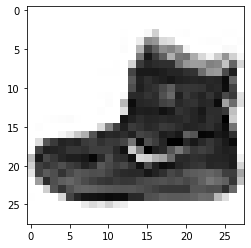

In [ ]:
plt.imshow(x_train[0],cmap="Greys")

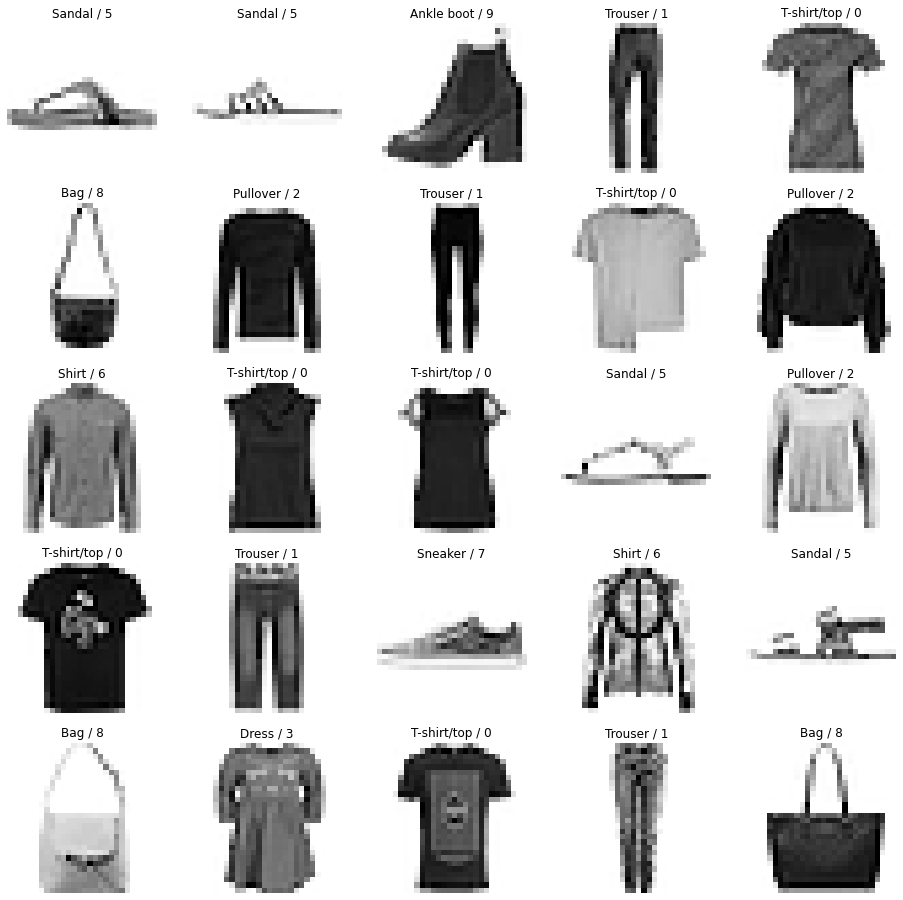

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_train[i],cmap="Greys")
  plt.axis("off")
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
x_train.ndim

3

In [ ]:
x_train = np.expand_dims(x_train,-1)

In [ ]:
x_train.ndim

4

In [ ]:
x_test = np.expand_dims(x_test,-1)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.3,random_state=2020)

In [ ]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((42000, 28, 28, 1), (18000, 28, 28, 1), (42000,), (18000,))

Step 3 : Build convolutional neural network

Model 1 simple

In [ ]:

cnn_model1=keras.models.Sequential([
                   tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                   tf.keras.layers.Flatten(),
                   tf.keras.layers.Dense(units=128, activation='relu'),
                   tf.keras.layers.Dense(units=10, activation='softmax')
                            ])

In [ ]:
cnn_model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               692352    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [ ]:
cnn_model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn_model1.fit(x_train,y_train,epochs=15,batch_size=16,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/15
2100/2100 [==============================] - 35s 16ms/step - loss: 0.4306 - accuracy: 0.8467 - val_loss: 0.3247 - val_accuracy: 0.8862
Epoch 2/15
2100/2100 [==============================] - 36s 17ms/step - loss: 0.2821 - accuracy: 0.8970 - val_loss: 0.3177 - val_accuracy: 0.8828
Epoch 3/15
2100/2100 [==============================] - 37s 18ms/step - loss: 0.2281 - accuracy: 0.9165 - val_loss: 0.3168 - val_accuracy: 0.8851
Epoch 4/15
2100/2100 [==============================] - 34s 16ms/step - loss: 0.1931 - accuracy: 0.9283 - val_loss: 0.2876 - val_accuracy: 0.9015
Epoch 5/15
2100/2100 [==============================] - 34s 16ms/step - loss: 0.1622 - accuracy: 0.9394 - val_loss: 0.2942 - val_accuracy: 0.9019
Epoch 6/15
2100/2100 [==============================] - 34s 16ms/step - loss: 0.1349 - accuracy: 0.9499 - val_loss: 0.2949 - val_accuracy: 0.9035
Epoch 7/15
2100/2100 [==============================] - 35s 16ms/step - loss: 0.1130 - accuracy: 0.9582 - val_loss: 0.3044 -

In [ ]:
y_pred=cnn_model1.predict(x_test)
y_pred.round(2)

313/313 [==============================] - 2s 8ms/step


array([[0.09, 0.12, 0.11, ..., 0.11, 0.08, 0.09],
       [0.09, 0.18, 0.09, ..., 0.09, 0.07, 0.08],
       [0.1 , 0.15, 0.09, ..., 0.09, 0.09, 0.09],
       ...,
       [0.09, 0.11, 0.11, ..., 0.1 , 0.09, 0.11],
       [0.1 , 0.15, 0.09, ..., 0.1 , 0.08, 0.09],
       [0.09, 0.12, 0.1 , ..., 0.11, 0.09, 0.09]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
cnn_model1.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.5029 - accuracy: 0.9011


[0.5028781890869141, 0.9010999798774719]

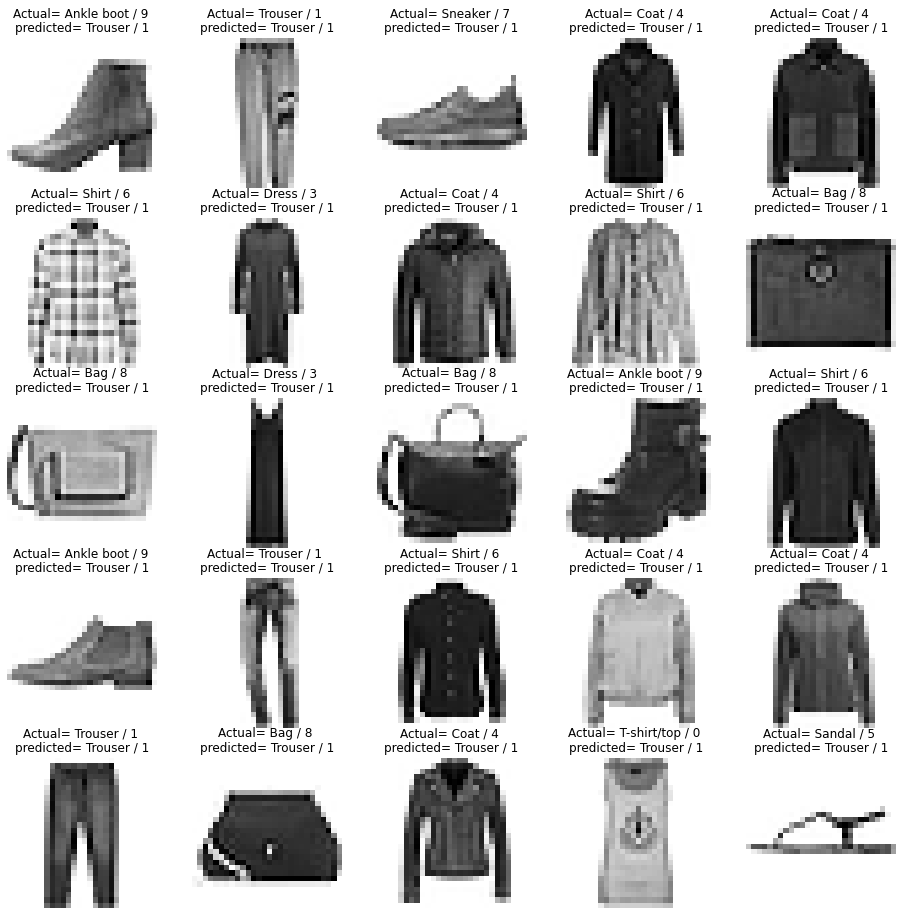

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap="Greys")
  plt.title('Actual= {} / {} \npredicted= {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

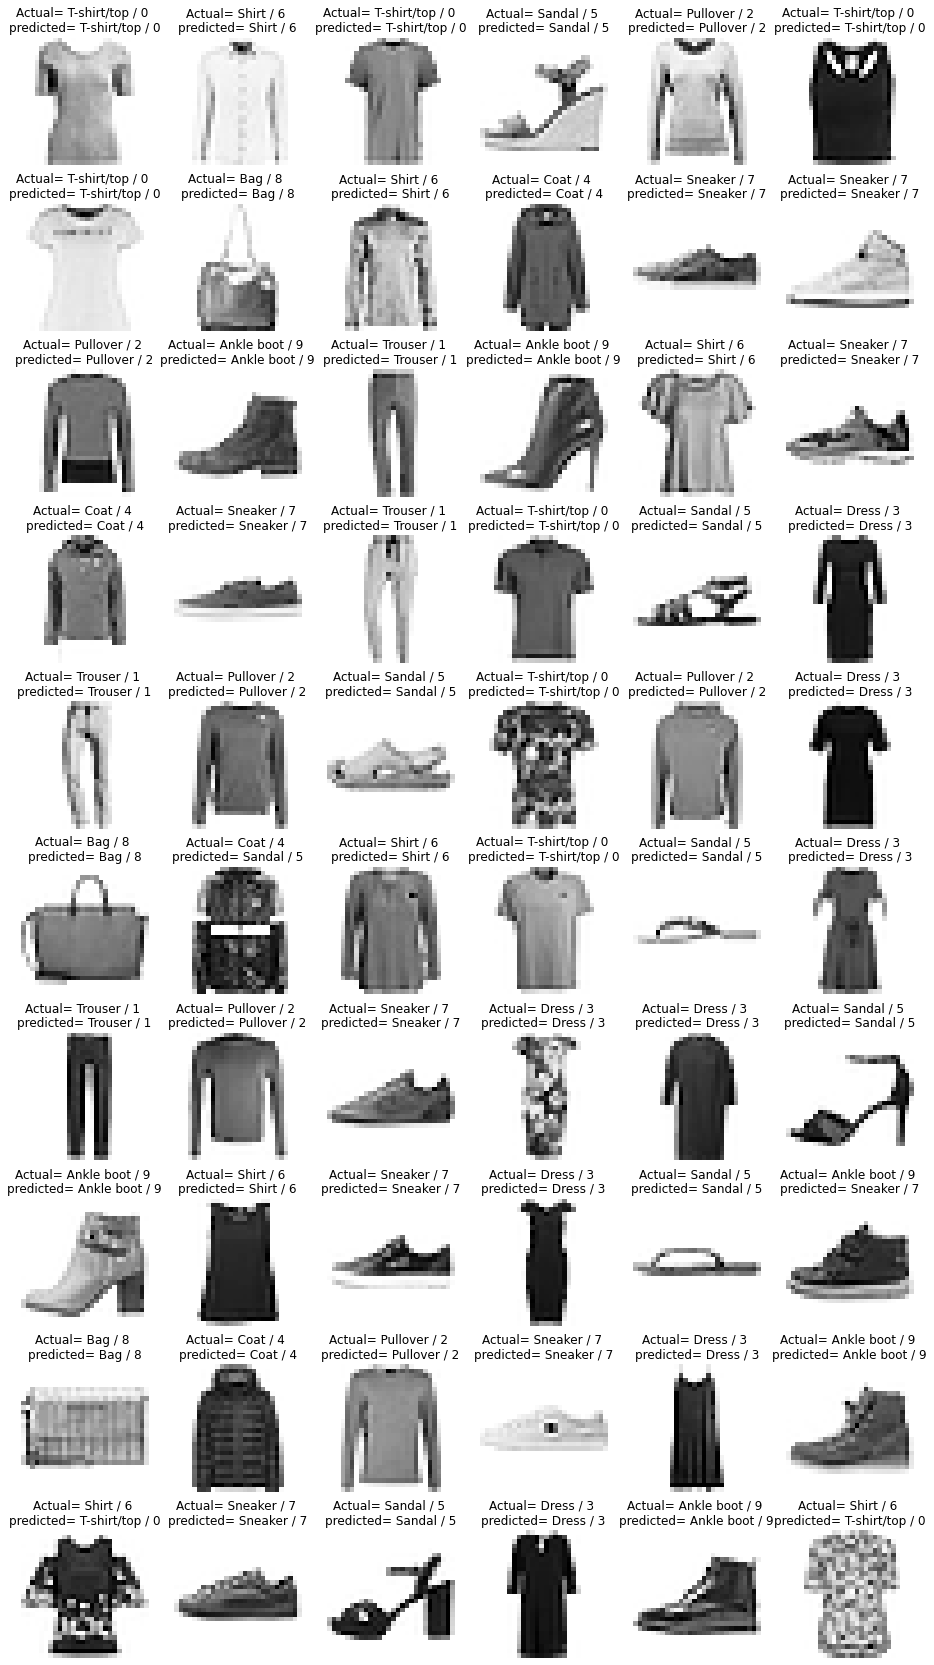

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap="Greys")
  plt.title('Actual= {} / {} \npredicted= {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

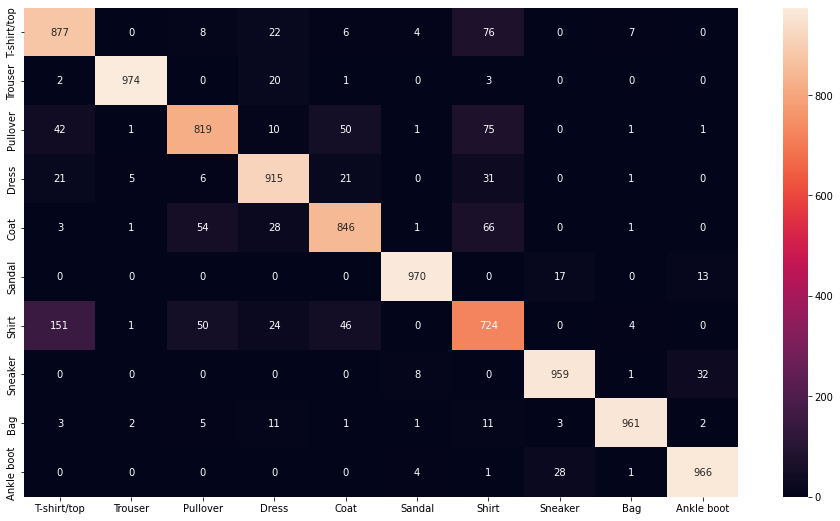

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [ ]:

from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.88      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.82      0.84      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.87      0.85      0.86      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.73      0.72      0.73      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
cnn_model1.save('fasion_mnist_cnn_model.h5')

**Model 2 complex** 

In [ ]:
cnn_model2=keras.models.Sequential([
                       tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                       tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                       tf.keras.layers.Flatten(),
                       tf.keras.layers.Dense(units=128, activation='relu'),
                       tf.keras.layers.Dropout(0.25),
                       tf.keras.layers.Dense(units=256, activation='relu'),
                       tf.keras.layers.Dropout(0.25),
                       tf.keras.layers.Dense(units=128, activation='relu'),
                       tf.keras.layers.Dense(units=10, activation='softmax')
                        ])

In [ ]:
cnn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model2.fit(x_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/20
2625/2625 [==============================] - 39s 14ms/step - loss: 0.4921 - accuracy: 0.8219 - val_loss: 0.3373 - val_accuracy: 0.8769
Epoch 2/20
2625/2625 [==============================] - 38s 14ms/step - loss: 0.3265 - accuracy: 0.8825 - val_loss: 0.3015 - val_accuracy: 0.8896
Epoch 3/20
2625/2625 [==============================] - 39s 15ms/step - loss: 0.2862 - accuracy: 0.8967 - val_loss: 0.2921 - val_accuracy: 0.8969
Epoch 4/20
2625/2625 [==============================] - 38s 14ms/step - loss: 0.2529 - accuracy: 0.9068 - val_loss: 0.2712 - val_accuracy: 0.9033
Epoch 5/20
2625/2625 [==============================] - 37s 14ms/step - loss: 0.2317 - accuracy: 0.9142 - val_loss: 0.2665 - val_accuracy: 0.9062
Epoch 6/20
2625/2625 [==============================] - 38s 14ms/step - loss: 0.2103 - accuracy: 0.9229 - val_loss: 0.2773 - val_accuracy: 0.9058
Epoch 7/20
2625/2625 [==============================] - 38s 14ms/step - loss: 0.1920 - accuracy: 0.9294 - val_loss: 0.2625 -

In [ ]:
y_pred2=cnn_model2.predict(x_test)
y_pred2.round(2)

313/313 [==============================] - 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.  ]], dtype=float32)

In [ ]:
cnn_model2.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3632 - accuracy: 0.9065


[0.3631955683231354, 0.906499981880188]

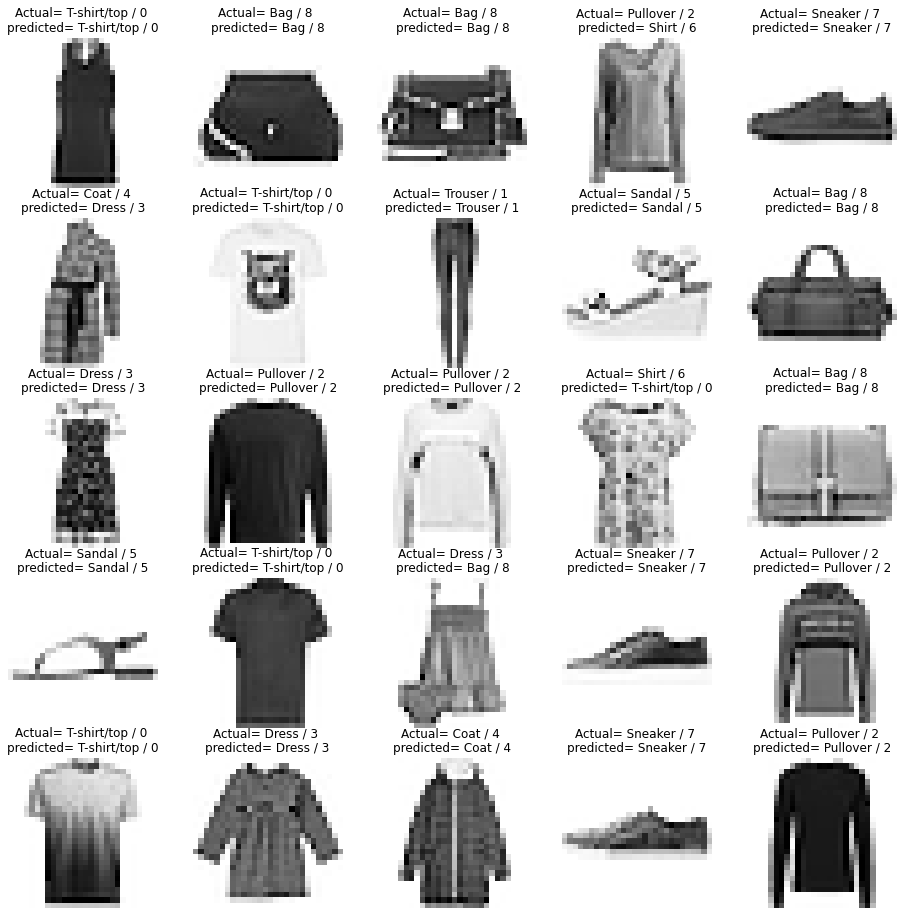

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap="Greys")
  plt.title('Actual= {} / {} \npredicted= {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred2[i])],np.argmax(y_pred2[i])))
  plt.axis('off')

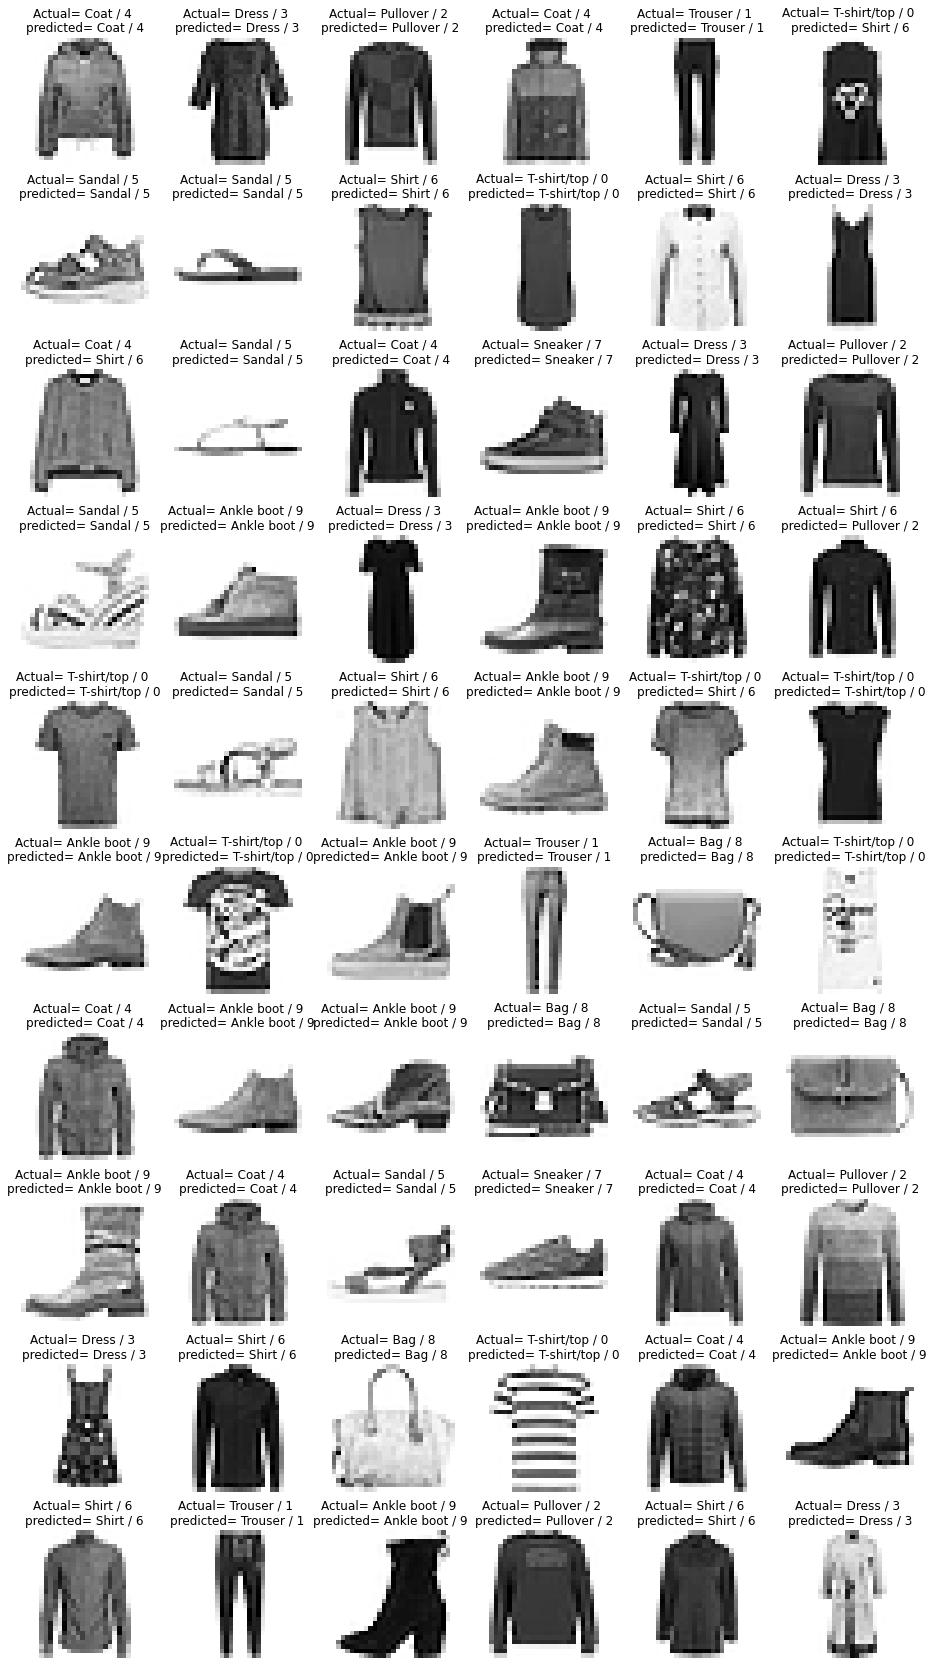

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap="Greys")
  plt.title('Actual= {} / {} \npredicted= {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred2[i])],np.argmax(y_pred2[i])))
  plt.axis('off')

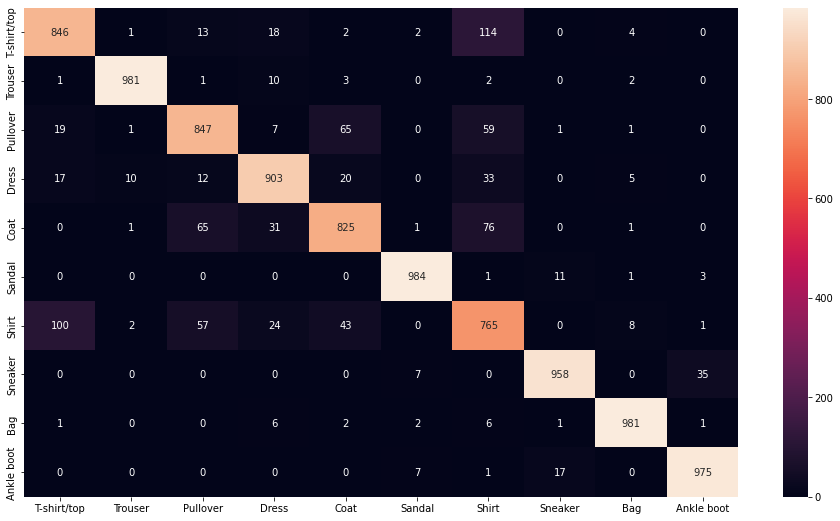

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred2_labels = [np.argmax(label) for label in y_pred2]
cm=confusion_matrix(y_test,y_pred2_labels)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr2=classification_report(y_test,y_pred2_labels,target_names=class_labels)
print(cr2)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.85      0.85      0.85      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.86      0.82      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.72      0.77      0.74      1000
     Sneaker       0.97      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
cnn_model2.save('fasion_mnist_cnn_model2.h5')

**Model 3 very complex**

In [ ]:
cnn_model3=keras.models.Sequential([
                   tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                   tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                   tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                   tf.keras.layers.Flatten(),
                   tf.keras.layers.Dense(units=128, activation='relu'),
                   tf.keras.layers.Dropout(0.25),
                   tf.keras.layers.Dense(units=256, activation='relu'),
                   tf.keras.layers.Dropout(0.5),
                   tf.keras.layers.Dense(units=256, activation='relu'),
                   tf.keras.layers.Dropout(0.25),
                   tf.keras.layers.Dense(units=128, activation='relu'),
                   tf.keras.layers.Dropout(0.10),
                   tf.keras.layers.Dense(units=10, activation='softmax')
                            ])

In [ ]:
cnn_model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model3.fit(x_train, y_train, epochs=25, batch_size=16, verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/25
2100/2100 [==============================] - 61s 29ms/step - loss: 0.3637 - accuracy: 0.8744 - val_loss: 0.3792 - val_accuracy: 0.8685
Epoch 2/25
2100/2100 [==============================] - 58s 28ms/step - loss: 0.3356 - accuracy: 0.8853 - val_loss: 0.3770 - val_accuracy: 0.8769
Epoch 3/25
2100/2100 [==============================] - 61s 29ms/step - loss: 0.3113 - accuracy: 0.8933 - val_loss: 0.3097 - val_accuracy: 0.8919
Epoch 4/25
2100/2100 [==============================] - 74s 35ms/step - loss: 0.2928 - accuracy: 0.8981 - val_loss: 0.3302 - val_accuracy: 0.8933
Epoch 5/25
2100/2100 [==============================] - 66s 31ms/step - loss: 0.2722 - accuracy: 0.9059 - val_loss: 0.3444 - val_accuracy: 0.8877
Epoch 6/25
2100/2100 [==============================] - 86s 41ms/step - loss: 0.2622 - accuracy: 0.9100 - val_loss: 0.3474 - val_accuracy: 0.8897
Epoch 7/25
2100/2100 [==============================] - 66s 31ms/step - loss: 0.2516 - accuracy: 0.9127 - val_loss: 0.3256 -

In [ ]:
y_pred3=cnn_model3.predict(x_test)
y_pred3.round(2)

313/313 [==============================] - 5s 14ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
cnn_model3.evaluate(x_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.4225 - accuracy: 0.8978


[0.4224607050418854, 0.8978000283241272]

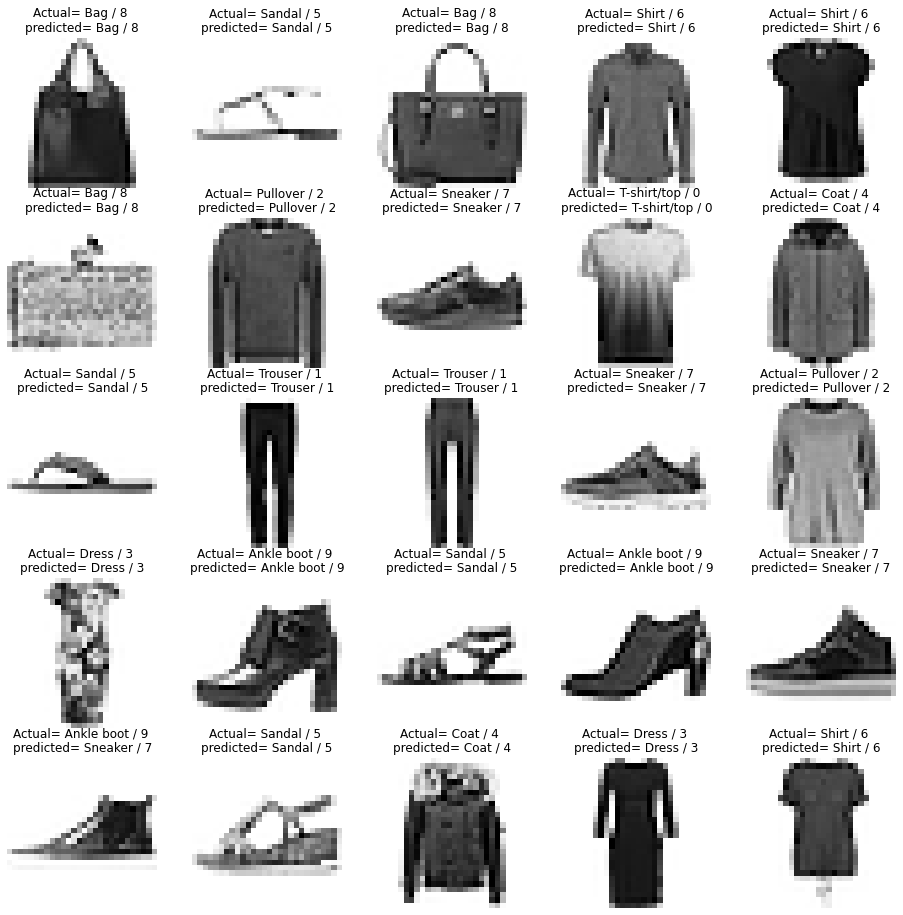

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap="Greys")
  plt.title('Actual= {} / {} \npredicted= {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred3[i])],np.argmax(y_pred3[i])))
  plt.axis('off')

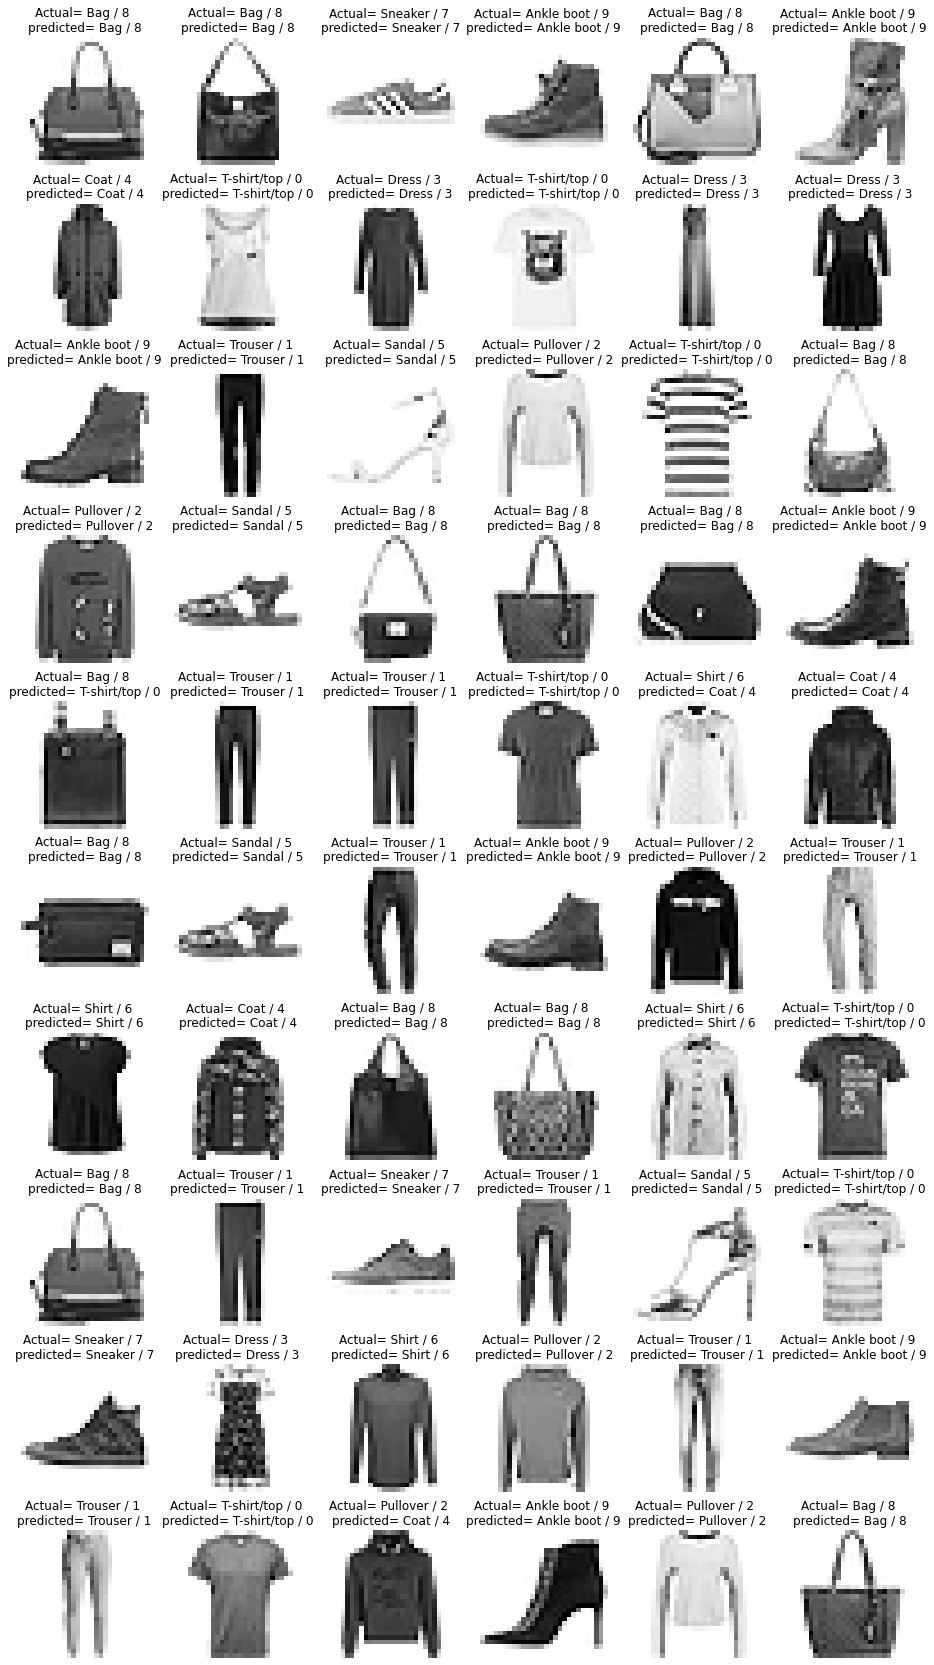

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap="Greys")
  plt.title('Actual= {} / {} \npredicted= {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred3[i])],np.argmax(y_pred3[i])))
  plt.axis('off')

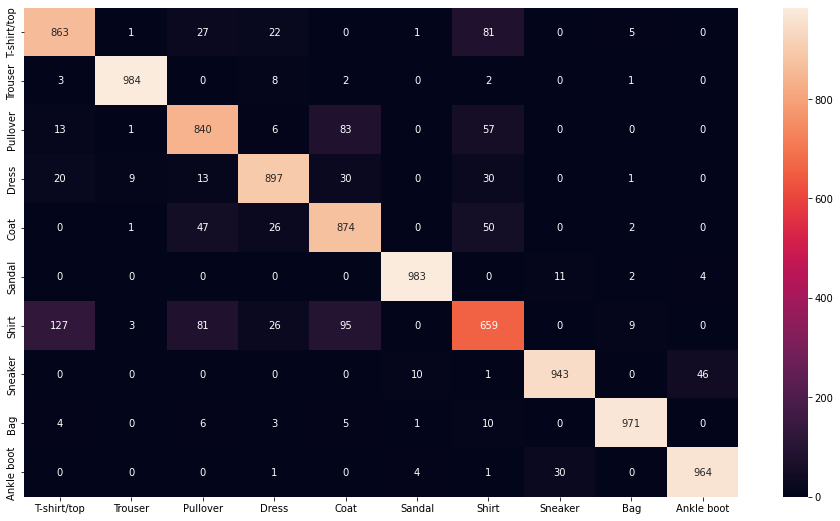

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred3_labels = [np.argmax(label) for label in y_pred3]
cm=confusion_matrix(y_test,y_pred3_labels)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr3=classification_report(y_test,y_pred3_labels,target_names=class_labels)
print(cr3)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.83      0.84      0.83      1000
       Dress       0.91      0.90      0.90      1000
        Coat       0.80      0.87      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.66      0.70      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
cnn_model3.save('fasion_mnist_cnn_model3.h5')